# Fraud detection project

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, r2_score


Let's load the dataset

In [5]:
df=pd.read_csv("creditcard.csv")

We display the first and last few rows of the dataset

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


# Data cleaning

Checking for missing values and duplicates


In [8]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [9]:
duplicates = df.duplicated().sum()
print("Duplicate Rows:", duplicates)

Duplicate Rows: 1081


It's great that there are no missing values, but we should indeed address the duplicate rows. Let's proceed to clean the data by removing those duplicates.

In [10]:
df = df.drop_duplicates()

# Verify that duplicates have been removed
duplicates_after_removal = df.duplicated().sum()
print("Duplicate Rows after Removal:", duplicates_after_removal)

Duplicate Rows after Removal: 0


# Exploratory Data Analysis (EDA)

In [11]:
# Summary statistics
summary_stats = df.describe()
print(summary_stats)

                Time             V1             V2             V3  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean    94811.077600       0.005917      -0.004135       0.001613   
std     47481.047891       1.948026       1.646703       1.508682   
min         0.000000     -56.407510     -72.715728     -48.325589   
25%     54204.750000      -0.915951      -0.600321      -0.889682   
50%     84692.500000       0.020384       0.063949       0.179963   
75%    139298.000000       1.316068       0.800283       1.026960   
max    172792.000000       2.454930      22.057729       9.382558   

                  V4             V5             V6             V7  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean       -0.002966       0.001828      -0.001139       0.001801   
std         1.414184       1.377008       1.331931       1.227664   
min        -5.683171    -113.743307     -26.160506     -43.557242   
25%        -0.850134      -0.6898

In [12]:
# Class distribution
class_distribution = df['Class'].value_counts()
print(class_distribution)

0    283253
1       473
Name: Class, dtype: int64


It's clear that this dataset is highly imbalanced, with a large number of non-fraud cases (Class 0) and a relatively small number of fraud cases (Class 1). This is a common challenge in fraud detection, and we are going to work on it 

<AxesSubplot: xlabel='Class', ylabel='V12'>

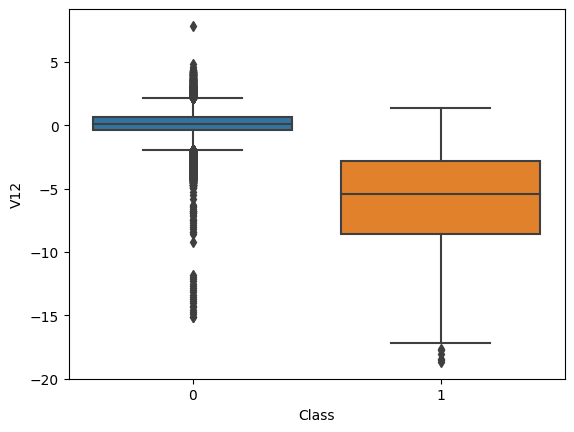

In [13]:
sns.boxplot(x="Class",y="V12",data=df)

The median for the "fraud" class is significantly different from the "non-fraud" class, it suggests that "V12" may be a relevant feature for distinguishing between the two classes, but We have more outliers for "non- fraud" class wich means that there may be unusual patterns in the data that are not related to fraud. Now let's select the feautures to include in the models

#  Feature Selection (Correlation Analysis)

In [14]:
correlations = df.corrwith(df['Class'])
# Sort correlations in descending order
sorted_correlations = correlations.abs().sort_values(ascending=False)

# Select the top N features with the highest absolute correlation
N = 10 
selected_features = sorted_correlations.index[1:N]  

In [15]:
sorted_correlations

Class     1.000000
V17       0.313498
V14       0.293375
V12       0.250711
V10       0.206971
V16       0.187186
V3        0.182322
V7        0.172347
V11       0.149067
V4        0.129326
V18       0.105340
V1        0.094486
V9        0.094021
V5        0.087812
V2        0.084624
V6        0.043915
V19       0.033631
V8        0.033068
V21       0.026357
V27       0.021892
V20       0.021486
Time      0.012359
V28       0.009682
V24       0.007210
V23       0.006333
Amount    0.005777
V22       0.004887
V26       0.004265
V13       0.003897
V15       0.003300
V25       0.003202
dtype: float64

In [16]:
selected_features

Index(['V17', 'V14', 'V12', 'V10', 'V16', 'V3', 'V7', 'V11', 'V4'], dtype='object')

In [17]:
y=df["Class"]

In [18]:
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Resample the data
X_resampled, y_resampled = smote.fit_resample(df[selected_features], y)

In [19]:
y_resampled.value_counts()

0    283253
1    283253
Name: Class, dtype: int64

Done, we've successfully balanced the data

# Model Building

In [20]:
# Split the balanced dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

#### Logistic Regression model

In [25]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

# Evaluate the Logistic Regression model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr)
confusion_lr = confusion_matrix(y_test, y_pred_lr)

print("Logistic Regression Model:")
print("Accuracy:", accuracy_lr)
print("Classification Report: " ,"\n", report_lr)
print(f"Confusion Matrix:","\n", confusion_lr)


Logistic Regression Model:
Accuracy: 0.9350232122998712
Classification Report:  
               precision    recall  f1-score   support

           0       0.90      0.97      0.94     56463
           1       0.97      0.90      0.93     56839

    accuracy                           0.94    113302
   macro avg       0.94      0.94      0.93    113302
weighted avg       0.94      0.94      0.93    113302

Confusion Matrix: 
 [[55021  1442]
 [ 5920 50919]]


#### Support Vector Machines model

Support Vector Machines (SVMs) can sometimes take longer to train, so subsampling the data can be an effective way to reduce the training time of SVM model while maintaining a representative subset of your dataset. Here's how you can subsample your data:

In [22]:
subsample_fraction = 0.1  # Adjust as needed

# Split the dataset into a subsample for training
X_subsample, _, y_subsample, _ = train_test_split(X_resampled, y_resampled, train_size=subsample_fraction, random_state=42)

In [24]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X_subsample, y_subsample)

y_pred_svm = svm_model.predict(X_test)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)
confusion_svm = confusion_matrix(y_test, y_pred_svm)

print("\nSupport Vector Machines (SVM) Model with Subsampled Data:")
print(f"Accuracy: {accuracy_svm}")
print(f"Classification Report:\n{report_svm}")
print(f"Confusion Matrix:\n{confusion_svm}")



Support Vector Machines (SVM) Model with Subsampled Data:
Accuracy: 0.9314486946391061
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93     56463
           1       0.98      0.88      0.93     56839

    accuracy                           0.93    113302
   macro avg       0.94      0.93      0.93    113302
weighted avg       0.94      0.93      0.93    113302

Confusion Matrix:
[[55455  1008]
 [ 6759 50080]]


Comparing the two models, both exhibit strong performance, and their metrics are quite similar.